In [1]:
%load_ext autoreload
%autoreload 2
from SyntheticControlMethods import Synth
import synth_utils as su
import pandas as pd
import numpy as np
import synth_job as sj
import cf_value as cfv

In [ ]:
df,first_day = su.build_synth_df(save=True)
df

In [ ]:
# df = cfv.build_ko_rankings()
# no_ders,w_ders = cfv.split_ders(df)
# tops = cfv.filter_one_top(w_ders)
tops = pd.read_pickle("high_vol_der.pkl")
tops_2 = pd.read_pickle("high_vol_ko.pkl")
combined_df = pd.concat([tops,tops_2])
unique_Alt = combined_df['Alt'].unique()
sj.make_and_save_alt_day_dict(unique_Alt)
combined_df

In [ ]:
tops_ders = cfv.filter_one_top(w_ders).head(10)
tops_no_ders = cfv.filter_one_top(no_ders).query("Top_ratio>0.1").head(10)
with open("high_vol_der.pkl","wb") as f:
    tops_ders.to_pickle(f)
with open("high_vol_ko.pkl","wb") as f: 
    tops_no_ders.to_pickle(f)


In [2]:
sj.get_all_placebo_results('ko',offset=False)

,slug,alt,num_samples,base_error,p_value,result_id,experiment
0,azuki,valhalla,709,1.150473,0.032440,0,ko
0,azuki,muribyfabrik,486,1.158497,0.049383,1,ko
0,doodles-official,wonderpals,308,0.014480,0.084416,4,ko
0,doodles-official,coolmans-universe,288,0.009441,0.079861,5,ko
0,pudgypenguins,sappy-seals,49,0.473692,0.979592,6,ko
0,pudgypenguins,winterbears,68,4466.116250,0.088235,7,ko
0,beanzofficial,sugartownoras,428,1.212456,0.032710,8,ko
0,cool-cats-nft,deadfellaz,26,1.990869,0.692308,9,ko
0,cool-cats-nft,alienfrensnft,292,1.032061,0.017123,10,ko
0,0n1-force,0xzuki,398,3.553209,0.012563,11,ko


In [ ]:
import pickle
slug = 'beanzofficial'
alt = 'sugartownoras'
with open('synth_df_cache.pkl','rb') as f:
        df,first_day = pickle.load(f)
with open('alt_day_dict.pkl','rb') as f:
    alt_day_dict = pickle.load(f)
alt_day = alt_day_dict[alt]
synth = sj.create_synth(slug,alt,norm=False,cached=True,alt_day=alt_day,offset=30)

In [41]:
res_num=0
outpath = f'val_comp/result_df{res_num}.pkl'
pd.read_pickle(outpath)

,slug,mean_samples,mean_data,interval_length,bandwidth
0,0n1-force,"[0.020489285714285727, 0.03780853813614967, -0...",-0.024636,1,None
1,0n1-force,"[-0.11056311826428568, -0.08441582819978934, 0...",-0.011447,5,None
2,0n1-force,"[0.01372142857142852, -0.049807142857142876, -...",-0.013682,10,None
3,0n1-force,"[0.030062584510714304, 0.05061389285714286, 0....",0.003284,15,None


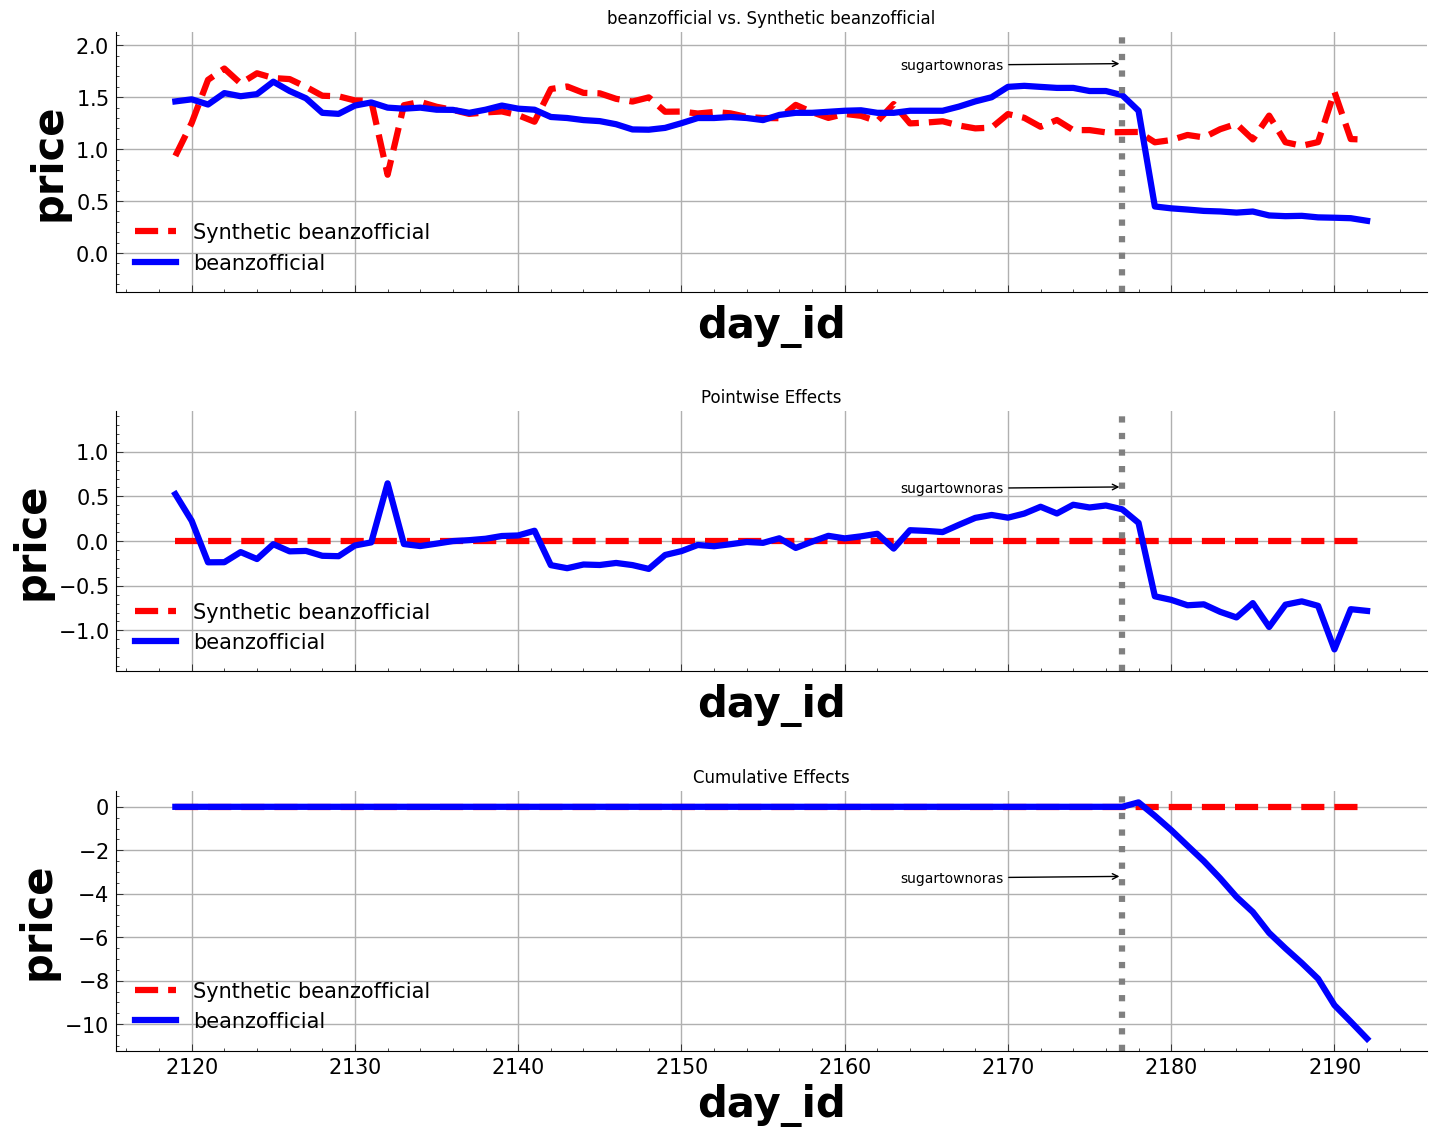

In [37]:
synth[0].plot(["original", "pointwise", "cumulative"], treated_label=slug, 
            synth_label=f"Synthetic {slug}", treatment_label=alt)

In [36]:
synth = sj.create_synth(slug,alt,norm=False,cached=True,alt_day=alt_day,offset=30)

/global/scratch/tlundy/NFT_Research/nft_research/Dino/synth_utils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if offset>0:


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45514D+05    |proj g|=  6.66667D-01
  ys=-3.684E+08  -gs= 1.906E+04 BFGS update SKIPPED


/global/scratch/tlundy/NFT_Research/nft_venv/lib/python3.8/site-packages/SyntheticControlMethods/optimize.py:182: RuntimeWarning: invalid value encountered in divide
  data.v = np.diagonal(V) / np.sum(np.diagonal(V)) #Make sure its normailzed (sometimes the optimizers diverge from bounds)



At iterate    3    f=  2.86069D+00    |proj g|=  1.58968D-08



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     62      9     1     3   1.590D-08   2.861D+00
  F =   2.8606900159811728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37220D+05    |proj g|=  9.88480D-01
  ys=-7.800E+08  -gs= 5.890E+04 BFGS update SKIPPED

At iterate    3    f=  2.21789D+01    |proj g|=  1.00000D+00

At iterate    6    f=  2.88915D+00    |proj g|=  7.31279D-07
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate    9    f=  2.85840D+00    |proj g|=  1.00000D+00

At iterate   12    f=  2.85469D+00    |proj g|=  9.99999D-01
  ys=-7.089E-14  -gs= 5.919E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  2.85469D+00    |proj g|=  7.57662D-07



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16    108     25     2     3   7.577D-07   2.855D+00
  F =   2.8546873448024059     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24870D+04    |proj g|=  9.98960D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    3    f=  8.24839D+04    |proj g|=  9.98959D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     22      6     0     0   7.468D-01   8.248D+04
  F =   82483.943264772475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49522D+05    |proj g|=  8.41348D-01
  ys=-2.023E+08  -gs= 4.786E+04 BFGS update SKIPPED

At iterate    3    f=  2.86069D+00    |proj g|=  1.58968D-08



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     63      9     1     3   1.590D-08   2.861D+00
  F =   2.8606900159821533     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14257D+04    |proj g|=  6.48340D-01
  ys=-1.640E+05  -gs= 1.594E+04 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     48     11     1     3   1.000D+00   2.038D+01
  F =   20.381988507152361     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37928D+05    |proj g|=  6.86484D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    3    f=  1.54058D+03    |proj g|=  6.64327D-01
  ys=-2.750E+07  -gs= 5.932E+03 BFGS update SKIPPED
  ys=-1.010E-04  -gs= 1.360E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    6    f=  2.03820D+01    |proj g|=  1.00000D+00

At iterate    9    f=  4.05884D+00    |proj g|=  1.22837D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     82     15     2     2   1.228D-08   4.059D+00
  F =   4.0588358115643386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43759D+05    |proj g|=  8.04971D-01
  ys=-7.923E+08  -gs= 2.865E+04 BFGS update SKIPPED

At iterate    3    f=  2.86069D+00    |proj g|=  1.58968D-08



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     62      9     1     3   1.590D-08   2.861D+00
  F =   2.8606900159811728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39113D+05    |proj g|=  9.79849D-01

At iterate    3    f=  1.39040D+05    |proj g|=  1.87392D-01
  ys=-1.847E+01  -gs= 1.881E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     68     10     1     3   8.126D-01   1.390D+05
  F =   139031.93854715163     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59433D+05    |proj g|=  9.30245D-01
  ys=-5.853E+08  -gs= 9.304E+04 BFGS update SKIPPED

At iterate    3    f=  2.86069D+00    |proj g|=  1.58968D-08



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     62      9     1     3   1.590D-08   2.861D+00
  F =   2.8606900159811728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39490D+05    |proj g|=  3.31549D-01
  ys=-1.760E+08  -gs= 3.741E+03 BFGS update SKIPPED

At iterate    3    f=  2.86069D+00    |proj g|=  1.58968D-08



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     62      9     1     3   1.590D-08   2.861D+00
  F =   2.8606900159811728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [35]:
pd.set_option('display.max_rows', 100)
synth[0].head(70)


,slug,day_id,price,occurrences,price_normalized
1933,0n1-force,2119,0.700000,39.0,0.921751
1934,0n1-force,2120,0.748750,52.0,0.985945
1935,0n1-force,2121,0.819222,12.0,1.078741
1936,0n1-force,2122,0.729000,10.0,0.959938
1937,0n1-force,2123,0.700000,19.0,0.921751
1938,0n1-force,2124,0.769500,10.0,1.013268
1939,0n1-force,2125,0.680000,15.0,0.895416
1940,0n1-force,2126,0.680000,20.0,0.895416
1941,0n1-force,2127,0.680000,29.0,0.895416
1942,0n1-force,2128,0.730000,17.0,0.961255


In [33]:
synth[0]

,day_id,slug,price,occurrences,price_normalized
0,2119,0n1-force,0.700000,39.0,0.921751
1,2120,0n1-force,0.748750,52.0,0.985945
2,2121,0n1-force,0.819222,12.0,1.078741
3,2122,0n1-force,0.729000,10.0,0.959938
4,2123,0n1-force,0.700000,19.0,0.921751
...,...,...,...,...,...
157451,2218,zunkz,0.022990,9.0,0.407311
157452,2219,zunkz,0.010995,2.0,0.194797
157453,2220,zunkz,0.020000,10.0,0.354337
157454,2221,zunkz,0.028950,2.0,0.512903


In [1]:
import cf_value as cfv

df = cfv.show_cf_val_results()

26
27
28
29
66
67
68
69
76
77
78
79
91
92
93
94
236
237
238
239
261
262
263
264


In [10]:
df['p_value'] = df['percentile'].apply(lambda x: x*len(df)/100)

In [23]:
df

,slug,mean_samples,mean_data,interval_length,bandwidth,percentile,p_value
0,0n1-force,"[0.020910357142857054, -0.028736035714285735, ...",-0.024636,1,50,29.46,98.9856
1,0n1-force,"[-0.032049214285714285, -0.036160353571428584,...",-0.011447,5,50,41.96,140.9856
2,0n1-force,"[0.025416155939285732, -0.06232864285714286, -...",-0.013682,10,50,37.58,126.2688
3,0n1-force,"[-0.01161668969285717, -0.04400024607142857, -...",0.003284,15,50,47.80,160.6080
0,0n1-force,"[-0.0015636372209931987, -0.004643876060714266...",-0.024636,1,25,30.62,102.8832
...,...,...,...,...,...,...,...
3,mfers,"[0.545, 0.5113, -0.58068, -0.5621249999999999,...",-0.478131,15,10,14.36,48.2496
0,mfers,"[0.058999999999999775, 0.6099199999999998, 0.3...",0.169200,1,5,58.22,195.6192
1,mfers,"[0.2622299999999999, 0.6618999999999999, -0.38...",-0.034000,5,5,31.94,107.3184
2,mfers,"[-0.053, 1.0152, 0.7928200000000001, -0.564712...",-0.238000,10,5,29.04,97.5744


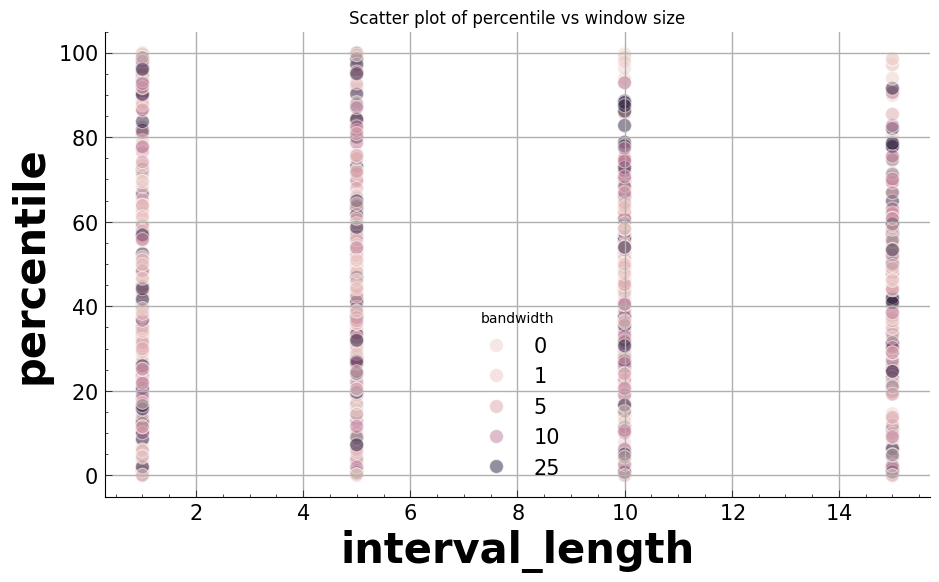

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and the columns are named 'percentile', 'window_size', and 'bandwidth'
df = df.fillna(0)
df = df.reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='interval_length', y='percentile', hue='bandwidth',alpha=0.5)
plt.title('Scatter plot of percentile vs window size')
plt.show()

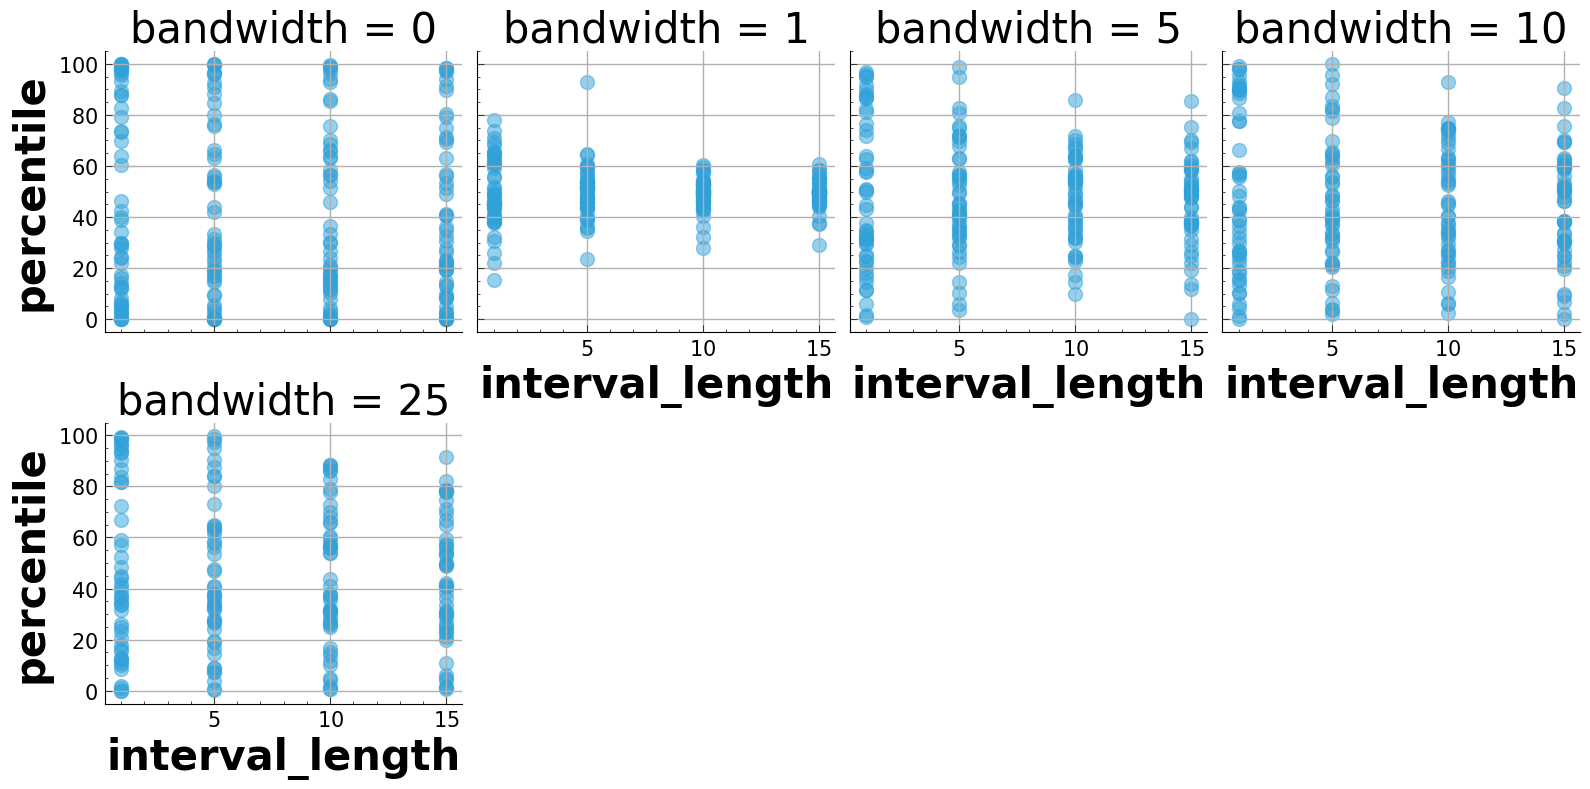

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, col="bandwidth", col_wrap=4, height=4)
g = g.map(plt.scatter, "interval_length", "percentile",alpha=0.5)

plt.show()

In [17]:
import pandas as pd
slug = 'cool-cats-nft'
alt = 'alienfrensnft'
df = pd.read_pickle('cool_cats_result_df_offset.pkl')
df

,unit,pre_rmspe,post_rmspe,post/pre
0,cool-cats-nft,0.876387,2.385090,2.721505
0,0n1-force,0.166160,0.192734,1.159931
0,0xvampire-project,0.538816,0.486371,0.902666
0,2545bygr4y,0.556649,0.482356,0.866536
0,8bituniverse,0.554056,0.480871,0.867911
...,...,...,...,...
0,wrapped-strikers,0.756337,0.172638,0.228255
0,zapper-fi,0.500828,0.433912,0.866390
0,zombiecat,0.498703,0.465975,0.934373
0,zombietoadzofficial,0.490419,0.449011,0.915566


In [18]:
num_samples = len(df)
base_error = df.query(f"unit=='{slug}'").iloc[0]['post/pre']
p_value = (sum(df['post/pre']>base_error)+1)/num_samples
#make df row out of results
row = pd.DataFrame({'slug':slug,'alt':alt,'num_samples':num_samples,'base_error':base_error,'p_value':p_value},index=[0])
row

,slug,alt,num_samples,base_error,p_value
0,cool-cats-nft,alienfrensnft,291,2.721505,0.006873
